In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd


In [ ]:
# Define file paths
input_csv = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/ddi_labels.csv"  # Full DDI dataset
output_csv = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/balanced_ddi_labels.csv"  # Balanced dataset


In [ ]:
# Load the DDI dataset
print("Loading ddi_labels.csv...")
ddi_labels_df = pd.read_csv(input_csv)
print(f"Dataset loaded with {len(ddi_labels_df)} rows.")

# Display the first few rows
print("Preview of the dataset:")
print(ddi_labels_df.head())


Loading ddi_labels.csv...


<ipython-input-4-ec035f0e91d9>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  ddi_labels_df = pd.read_csv(input_csv)


Dataset loaded with 30423900 rows.
Preview of the dataset:
     drug1 drug1_name    drug2           drug2_name  label description
0  DB00303  Ertapenem  DB00114  Pyridoxal phosphate      0         NaN
1  DB00303  Ertapenem  DB00117            Histidine      0         NaN
2  DB00303  Ertapenem  DB00142        Glutamic acid      0         NaN
3  DB00303  Ertapenem  DB02340      N-Acetyl-Serine      0         NaN
4  DB00303  Ertapenem  DB11300             Thrombin      0         NaN


In [ ]:
# Separate positive and negative labels
print("Separating positive and negative interactions...")
positive_df = ddi_labels_df[ddi_labels_df["label"] == 1]
negative_df = ddi_labels_df[ddi_labels_df["label"] == 0]

# Display counts
print(f"Total positive labels: {len(positive_df)}")
print(f"Total negative labels: {len(negative_df)}")


Separating positive and negative interactions...
Total positive labels: 448332
Total negative labels: 29975568


In [ ]:
# Balance the dataset by undersampling the negative class
print("Balancing the dataset by undersampling negative labels...")
negative_sample = negative_df.sample(len(positive_df), random_state=42)

# Combine positive and negative samples
balanced_df = pd.concat([positive_df, negative_sample])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42)

print(f"Balanced dataset created with {len(balanced_df)} rows.")


Balancing the dataset by undersampling negative labels...
Balanced dataset created with 896664 rows.


In [ ]:
# Save the balanced dataset to a new file
balanced_df.to_csv(output_csv, index=False)
print(f"Balanced dataset saved to: {output_csv}")


Balanced dataset saved to: /content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/balanced_ddi_labels.csv


In [ ]:
# Load and verify the balanced dataset
print("Verifying the balanced dataset...")
verified_df = pd.read_csv(output_csv)

# Display the first few rows
print("Preview of the balanced dataset:")
print(verified_df.head())

# Display counts of positive and negative labels
print(f"Positive labels: {sum(verified_df['label'] == 1)}")
print(f"Negative labels: {sum(verified_df['label'] == 0)}")


Verifying the balanced dataset...
Preview of the balanced dataset:
     drug1                                         drug1_name    drug2  \
0  DB01142                                            Doxepin  DB08230   
1  DB02386                            Leucine Phosphonic Acid  DB06921   
2  DB05232                                       Tetrodotoxin  DB06813   
3  DB00823                               Ethynodiol diacetate  DB00975   
4  DB03476  Trans-6-(2-Phenylcyclopropyl)-Naphthalene-2-Ca...  DB04210   

                                          drug2_name  label  \
0                                           Tricetin      0   
1  (2S)-2-[3-(AMINOMETHYL)PHENYL]-3-[(R)-HYDROXY{...      0   
2                                       Pralatrexate      1   
3                                       Dipyridamole      1   
4  3-(alpha-D-galactopyranosyloxy)-N-(3-{4-[3-({2...      0   

                                         description  
0                                                NaN  

### Visualisation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud


In [ ]:
# Load the balanced dataset
balanced_csv = "/content/drive/MyDrive/Colab Notebooks/DDI_Prediction_Project/data/balanced_ddi_labels.csv"
balanced_df = pd.read_csv(balanced_csv)

print(f"Dataset loaded with {len(balanced_df)} rows.")


Dataset loaded with 896664 rows.


### Word Cloud with Drug Names in Descriptions

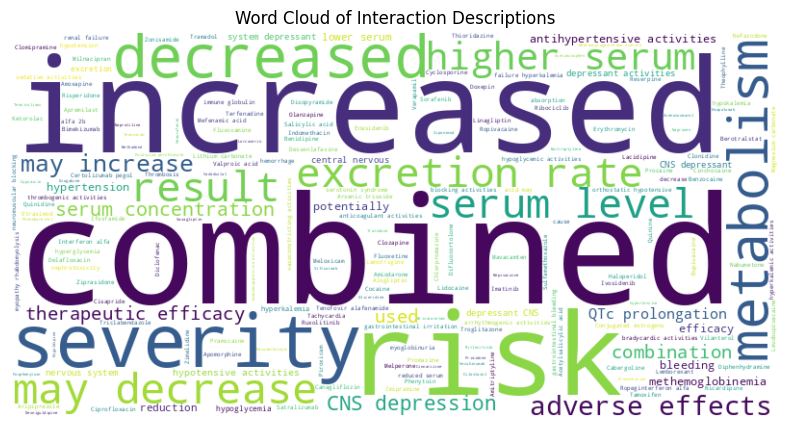

In [ ]:
# Combine all descriptions into one string
all_descriptions = " ".join(balanced_df["description"].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Interaction Descriptions")
plt.show()


In [ ]:
!pip install squarify


### The top 20 most frequent drug interaction pairs are identified

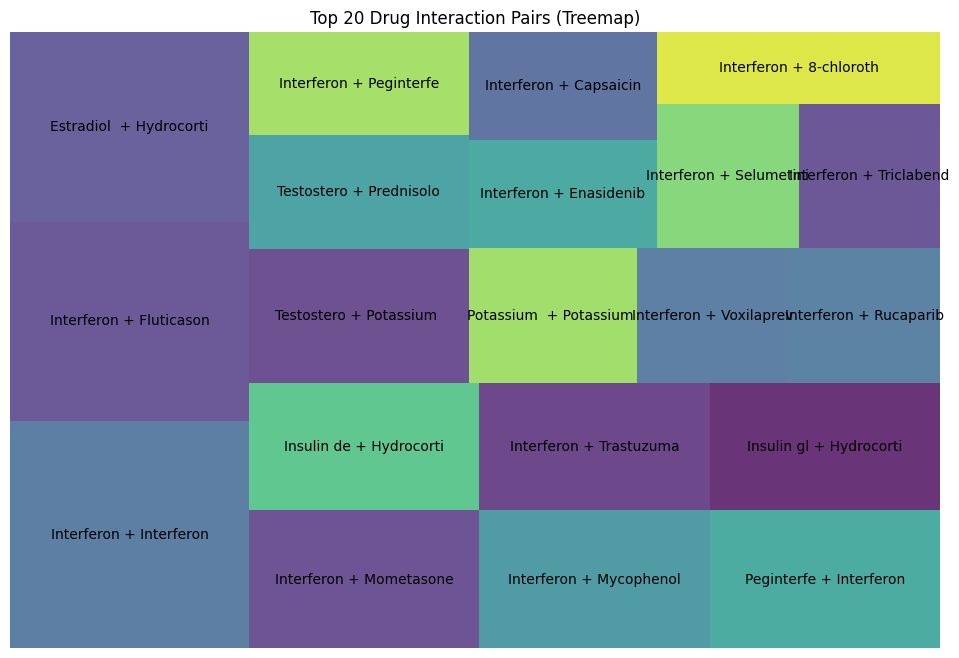

In [ ]:
import squarify

# Create Drug Interaction Pairs
interaction_pairs = balanced_df[["drug1_name", "drug2_name"]].copy()

# Combine drug1 and drug2 names into a single pair column
interaction_pairs["pair"] = interaction_pairs["drug1_name"] + " + " + interaction_pairs["drug2_name"]

# Truncate or Abbreviate Long Drug Names
# Option 1: Truncate names to the first 10 characters
interaction_pairs["drug1_name"] = interaction_pairs["drug1_name"].str[:10]
interaction_pairs["drug2_name"] = interaction_pairs["drug2_name"].str[:10]
interaction_pairs["pair"] = interaction_pairs["drug1_name"] + " + " + interaction_pairs["drug2_name"]

# Count Occurrences of Interaction Pairs
pair_counts = interaction_pairs["pair"].value_counts().head(20)  # Top 20 pairs

# Plot the Treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=pair_counts.values, label=pair_counts.index, alpha=0.8)
plt.title("Top 20 Drug Interaction Pairs (Treemap)")
plt.axis("off")
plt.show()

### Barchart  top 10 most frequent interaction pairs

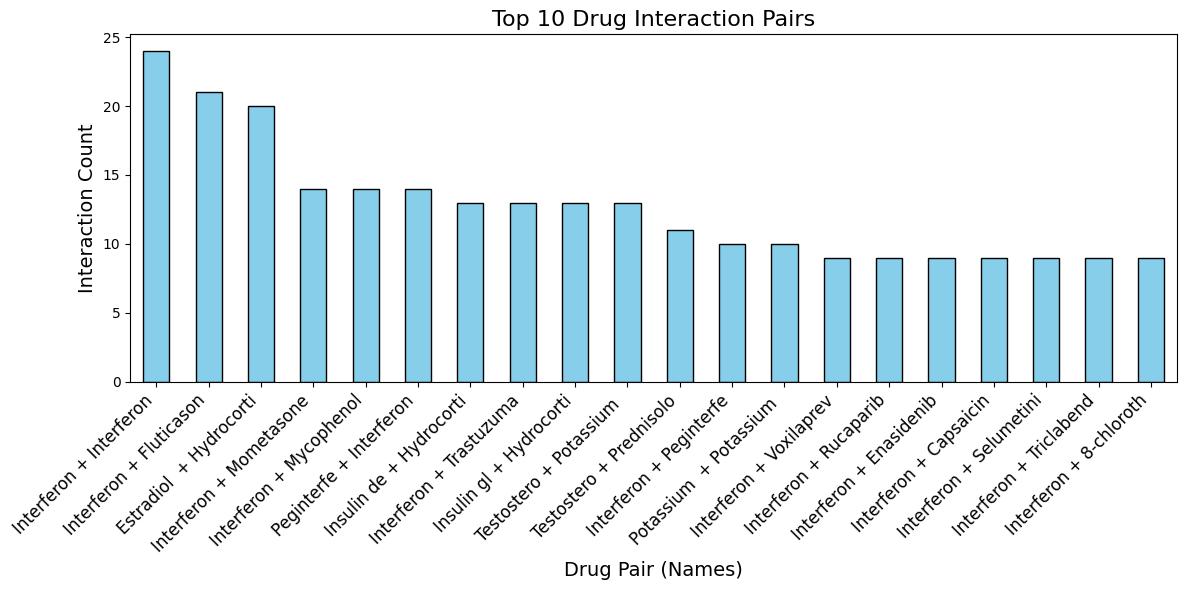

In [ ]:
#Plot the Bar Graph
plt.figure(figsize=(12, 6))
pair_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Drug Interaction Pairs", fontsize=16)
plt.xlabel("Drug Pair (Names)", fontsize=14)
plt.ylabel("Interaction Count", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

### A network graph
*   Nodes: Represent drugs by name.
*   Edges: Represent interactions between drug pairs.




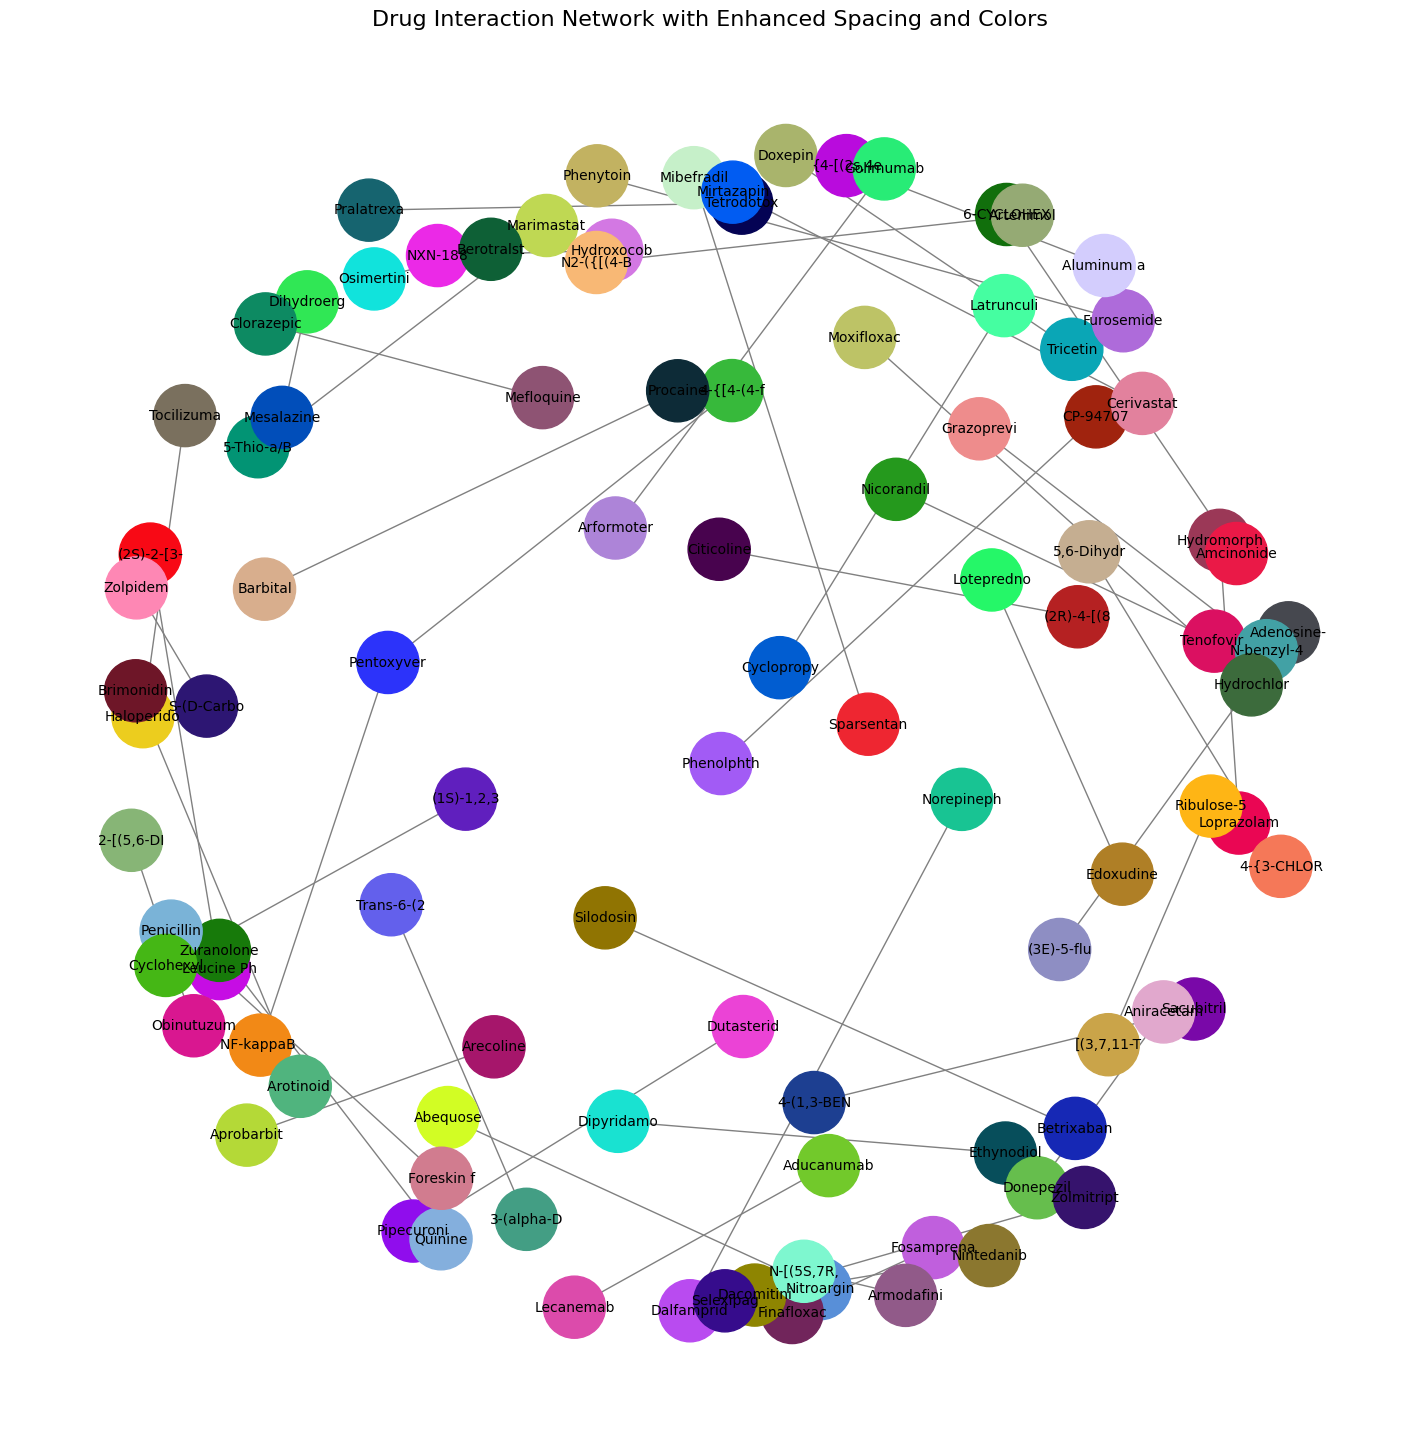

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Step 3: Limit Data for Visualization
# Use a subset of interactions for better readability (e.g., top 50)
interaction_subset = interaction_pairs.head(50)

# Step 4: Create a Network Graph
# Initialize an undirected graph
G = nx.Graph()

# Add edges (drug pairs) to the graph
for _, row in interaction_subset.iterrows():
    G.add_edge(row["drug1_name"], row["drug2_name"])

# Step 5: Assign Random Node Colors
# Generate a color map for nodes
node_colors = [
    "#{:06x}".format(random.randint(0, 0xFFFFFF)) for _ in range(len(G.nodes()))
]

# Step 6: Visualize the Network Graph
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.7, seed=42)  # Increase k for more spacing
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color=node_colors,
    node_size=2000,
    font_size=10,
    edge_color="gray",
    font_color="black"
)
plt.title("Drug Interaction Network with Enhanced Spacing and Colors", fontsize=16)
plt.show()

### Radial Tree Network

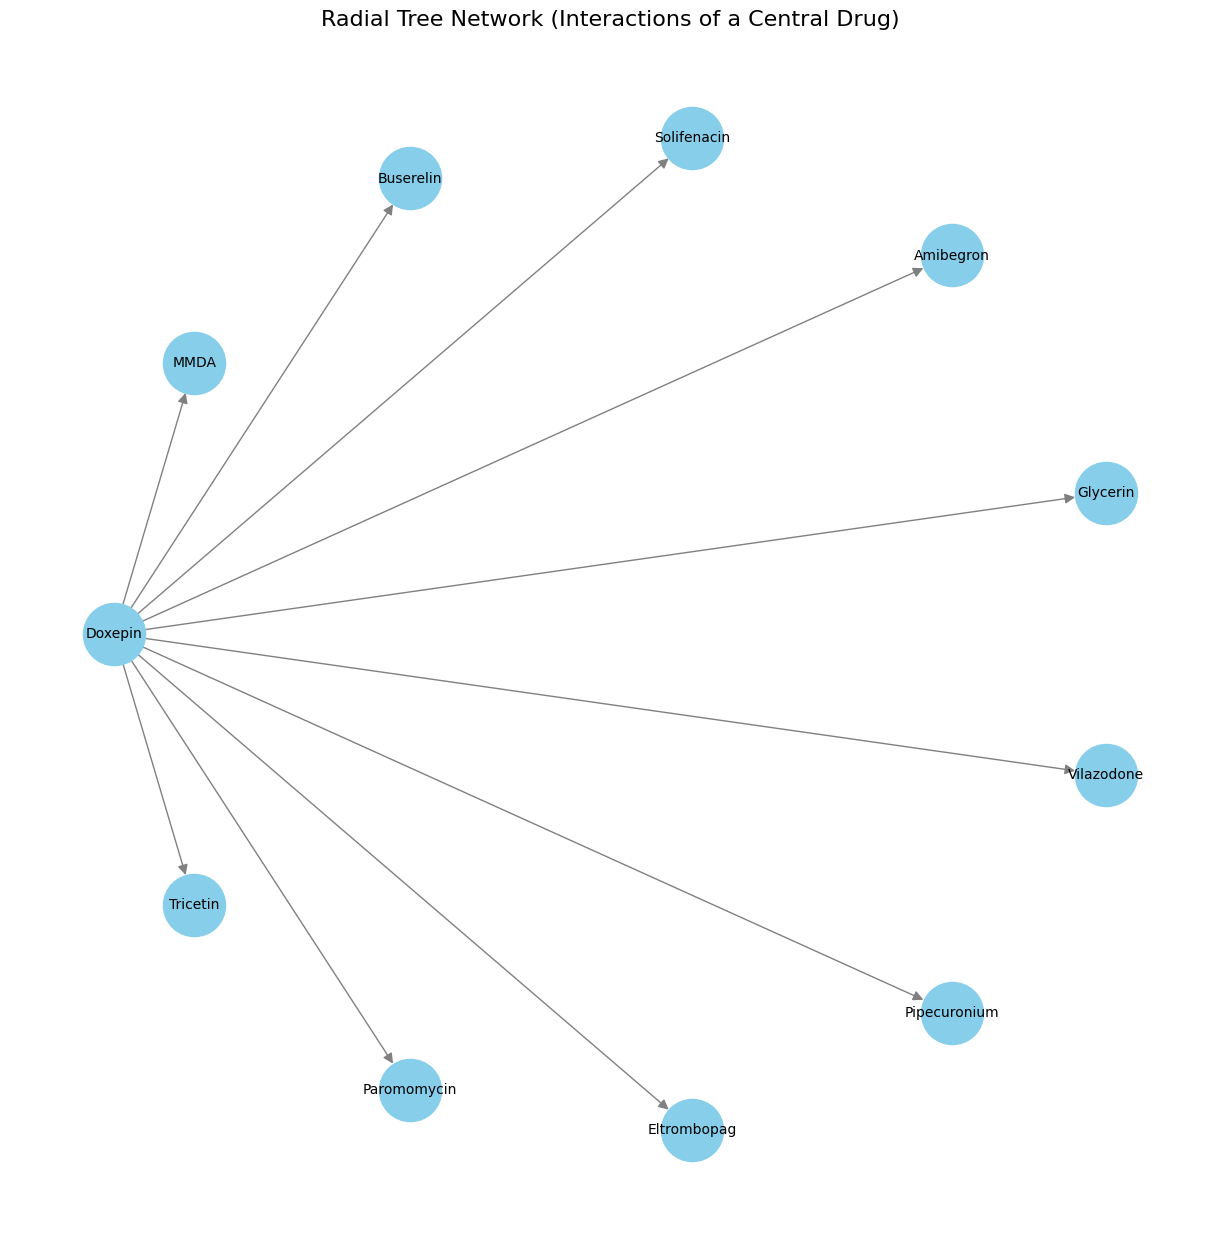

In [ ]:
# Step 1: Select a Root Node (e.g., a frequently interacting drug)
root_drug = balanced_df["drug1_name"].iloc[0]

# Step 2: Create a Tree Graph
tree_G = nx.DiGraph()
tree_G.add_node(root_drug)

# Add child nodes and edges
for _, row in balanced_df[balanced_df["drug1_name"] == root_drug].head(10).iterrows():
    tree_G.add_edge(root_drug, row["drug2_name"])

# Step 3: Visualize the Radial Tree Graph
plt.figure(figsize=(12, 12))
pos = nx.shell_layout(tree_G)  # Use a shell (radial) layout
nx.draw(
    tree_G,
    pos,
    with_labels=True,
    node_color="skyblue",
    node_size=2000,
    font_size=10,
    edge_color="gray",
    arrowsize=15
)
plt.title("Radial Tree Network (Interactions of a Central Drug)", fontsize=16)
plt.show()
